# Project 4: Web Scraping Indeed.com & Predicting Salaries

In Project 4, we practice two major skills: collecting data via  web scraping and building a binary predictor with Logistic Regression.

We will collect salary information on data science jobs in a variety of markets. Using location, title, and job summary, we'll predict the salary of the job. For job posting sites, this is extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), extrapolating expected salary can help guide negotiations.

Normally, we can use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Q: Why would we want this to be a classification problem?
- A: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Section one focuses on scraping Indeed.com; then we use listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

Scrape job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries. First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract.

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
URL = 'http://www.indeed.com/jobs?q=data+scientist+$20,000&l=New+York&start=10'

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib2
indeed ='http://www.indeed.com/jobs?q=data+scientist+$20,000&l=New+York&start=10'
page =urllib2.urlopen(indeed)

In [3]:
soup = BeautifulSoup(page)
soup.prettify

/Users/alexandertam/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


<bound method BeautifulSoup.prettify of <!DOCTYPE html>\n<html lang="en">\n<head>\n<meta content="text/html;charset=unicode-escape" http-equiv="content-type"/>\n<!-- pll --><script src="/s/2c2181b/en_US.js" type="text/javascript"></script>\n<link href="/s/1a7c741/jobsearch_all.css" rel="stylesheet" type="text/css"/>\n<link href="http://rss.indeed.com/rss?q=data+scientist+%2420%2C000&amp;l=New+York" rel="alternate" title="Data Scientist $20,000 Jobs, Employment in New York, NY" type="application/rss+xml"/>\n<link href="/m/jobs?q=data+scientist+%2420%2C000&amp;l=New+York" media="handheld" rel="alternate"/>\n<script type="text/javascript">\n    \n    window['closureReadyCallbacks'] = [];\n\n    function call_when_jsall_loaded(cb) {\n        if (window['closureReady']) {\n            cb();\n        } else {\n            window['closureReadyCallbacks'].push(cb);\n        }\n    }\n</script>\n<script src="/s/10e3ad5/jobsearch-all-compiled.js" type="text/javascript"></script>\n<script type="t

In [4]:
#print page title
soup.title.string

u'Data Scientist $20,000 Jobs, Employment in New York, NY\n|\nIndeed.com'

In [5]:
# read site in soup
r = requests.get(indeed)
soup = BeautifulSoup(r.content, "lxml")
#soup = BeautifulSoup(r.content)
# Append to the full set of results
results = soup.findAll('div', { "class" : "result" })
results

[<div class="row result" data-jk="ce232417b0b3dda8" id="pj_ce232417b0b3dda8">\n<a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0A7-XM98oIHUCoYA3WwdH8LVheBLfLgvborW9J93TrYiIziUPT66biVJZuGFjuGPurbNXxFMfhfWsF05zjl-7XkTxL8t6h-n3Nfy44DlHTDYeTySNwiYGauY7Fs2RUuEL6m5zAy6SKiVGYgu5rxxDzvrvZ3UUjhEAOZjlCkaI3NYLedyRS8-cPB7JuWNPxIgGknofY82O4kRn9XeThDGiY98TBIwagY78Ui_-U0QtkvOzHS7abRHxGwuUkAnLWvp4rhn4pPzXcAXC2MFBVlDXk7XD2sWrADhyugkIRwBGi7G7AXJC5kj_bJt29yv4PV7F4LBqs-D3tH4Y4m2b2uOo5-v0F_Fr_wJcEsaT6Ov_YnUifGs-zoI0LTRz_OZA9OdrADjEF5wzer-qKpW9FQDiY9oPjr1s9HKrg=&amp;p=1&amp;sk=&amp;fvj=0" id="sja1" onclick="setRefineByCookie(['salest']); sjoc('sja1',1); convCtr('SJ', pingUrlsForGA)" onmousedown="sjomd('sja1'); clk('sja1');" rel="nofollow" target="_blank" title="Top 1% Business Intelligence Analyst">Top 1% Business Intelligence Analyst</a>\n<br/>\n<div class="sjcl">\n<span class="company">\n    Consulting.com</span>\n\n - <span class="location">New York, NY

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some of the more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```

- Make sure these functions are robust and can handle cases where the data/field may not be available
- Test the functions on the results above

In [6]:
# get text
def extract_text(el):
    if el:
        return el.text.strip()
    else:
        return ''
        
# company
def get_company_from_result(result):
    return extract_text(result.find('span', {'class' : 'company'}))

# location
def get_location_from_result(result):
    return extract_text(result.find('span', {'class' : 'location'}))
# summary
def get_summary_from_result(result):
    return extract_text(result.find('span', {'class' : 'summary'}))
# title
# def get_title_from_result(result):
#     return extract_text(result.find('span', {'class' : 'title'}))
def get_title_from_result(result):
    return extract_text(result.find('a', {'data-tn-element' : 'jobTitle'}))
# get salary if exists
def get_salary_from_result(result):
    salary_table = result.find('td', {'class' : 'snip'})
    if salary_table:
        snip = salary_table.find('nobr')
        if snip:
            return snip.text.strip()   
    return None

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results: the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try different city). The second controls where in the results to start and gives 10 results (so we can keep incrementing this by 10 to move further within the list).

#### Complete the following code to collect results from multiple cities and start points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [7]:
import pandas as pd
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
YOUR_CITY=['Atlanta','Alpharetta','San+Francisco','Mountain+View','Palo+Alto','Santa+Clara','New+York',
             'Jacksonville','Miami','Charlotte','Washington','Seattle','Austin','Houston','Denver','Baltimore','Arlington',
             'Charlottesville','Cincinnati','Cleveland','Boston','Cambridge']

#results = []
df= pd.DataFrame()
for city in YOUR_CITY:
    for i in range(0,500,10):
        LINK = url_template.format(city,i)
        r= requests.get(LINK)
        soup = BeautifulSoup(r.content)
        results = soup.find_all("div", {"class" : "result"})
    
        for result in results:
            if result:
                company=get_company_from_result(result)
                title=get_title_from_result(result)
                location=get_location_from_result(result)
                salary=get_salary_from_result(result)
            

                df= df.append({'Company Name':company, "Job Title":title,'Location':location, 'Salary':salary}, ignore_index =True)
df

# df= pd.DataFrame()
# for city in YOUR_CITY:
#     for i in range(0,500,10):
#         LINK = url_template.format(city,i)
#         r= requests.get(LINK)
#         soup = BeautifulSoup(r.content)
#         data = soup.find_all("div", {"class" : "result"})
    
#         for element in range(len(data)):
#             Name = data[element].find("span", {"class": 'company'}).get_text().strip()
#             #if Name != None:
#                 #Name2 =Name.get_text().strip()
#             City = data[element].find("span", {"class": 'location'}).get_text().strip()
#             #if City != None:
#                 #City2 =City.get_text().strip()
#             Summary = data[element].find('span', {'class' : 'summary'}).get_text().strip()
            
#             JobTitle= data[element].find('a', {'data-tn-element' : 'jobTitle'}).get_text().strip()
    
        
#             Salary = data[element].find("td", {"class": 'snip'}).get_text().strip()
            

#             df= df.append({'Name':Name, "City":City,'Summary':Summary,"JobTitle":JobTitle, 'Salary':Salary}, ignore_index =True)
# df

,Company Name,Job Title,Location,Salary
0,Cox Communications,"Manager, Data Analysis","Atlanta, GA",None
1,MobileDev Power,Data Scientist With Predictive Modeling,"Atlanta, GA 30305",None
2,"IHRC, Inc.",Statistician,"Atlanta, GA 30346",None
3,Infor,Sr. Data Scientist,"Atlanta, GA",None
4,Centers for Disease Control and Prevention,Statistician (Health),"Atlanta, GA","$88,305 - $114,802 a year"
5,Pivotal Software,Sr. Data Scientist,"Atlanta, GA",None
6,Macy's,Sr. Data Scientist,"Atlanta, GA",None
7,"eTek IT Services, Inc.",Big Data Engineer,"Atlanta, GA",$67 an hour
8,Vesta Corporation,Senior Data Scientist,"Atlanta, GA 30303 (Five Points area)",None
9,Cox Automotive,Senior Data Scientist,"Atlanta, GA",None


In [8]:
 df.shape

(16216, 4)

In [131]:
df.head()

,Company Name,Job Title,Location,Salary
0,Cox Communications,"Manager, Data Analysis","Atlanta, GA",None
1,MobileDev Power,Data Scientist With Predictive Modeling,"Atlanta, GA 30305",None
2,"IHRC, Inc.",Statistician,"Atlanta, GA 30346",None
3,Infor,Sr. Data Scientist,"Atlanta, GA",None
4,Centers for Disease Control and Prevention,Statistician (Health),"Atlanta, GA","$88,305 - $114,802 a year"


In [9]:
df2=df.drop_duplicates().copy()


In [10]:
df2.shape

(4829, 4)

In [11]:
df.dtypes

Company Name    object
Job Title       object
Location        object
Salary          object
dtype: object

#create a dataframe and replace no entry with none for  salary no bolean


In [12]:
df_no_salary=df2[df['Salary'].isnull()].copy()
df_no_salary.head()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Company Name,Job Title,Location,Salary
0,Cox Communications,"Manager, Data Analysis","Atlanta, GA",None
1,MobileDev Power,Data Scientist With Predictive Modeling,"Atlanta, GA 30305",None
2,"IHRC, Inc.",Statistician,"Atlanta, GA 30346",None
3,Infor,Sr. Data Scientist,"Atlanta, GA",None
5,Pivotal Software,Sr. Data Scientist,"Atlanta, GA",None


In [13]:
df2.head()

,Company Name,Job Title,Location,Salary
0,Cox Communications,"Manager, Data Analysis","Atlanta, GA",None
1,MobileDev Power,Data Scientist With Predictive Modeling,"Atlanta, GA 30305",None
2,"IHRC, Inc.",Statistician,"Atlanta, GA 30346",None
3,Infor,Sr. Data Scientist,"Atlanta, GA",None
4,Centers for Disease Control and Prevention,Statistician (Health),"Atlanta, GA","$88,305 - $114,802 a year"


In [14]:
#drop the none values
df2.dropna(inplace =True)

In [15]:
df2.head()

,Company Name,Job Title,Location,Salary
4,Centers for Disease Control and Prevention,Statistician (Health),"Atlanta, GA","$88,305 - $114,802 a year"
7,"eTek IT Services, Inc.",Big Data Engineer,"Atlanta, GA",$67 an hour
25,Emory University,Epidemiologist,"Atlanta, GA","$105,300 a year"
36,Centers for Disease Control and Prevention,Health Scientist,"Atlanta, GA","$104,349 - $135,656 a year"
40,Analytic Recruiting,Junior Data Scientist,"Alpharetta, GA","$75,000 - $90,000 a year"


In [16]:
df2.shape

(342, 4)

In [17]:
df2.to_csv('indeedsoup_file.csv', encoding='utf-8')

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

ALREADY BEEN DONE(SEE ABOVE)

In [18]:
# # combine data into dictionaries
# rows = []
# for result in results:
#     if result:
#         row = {}

# # create dataframe
# import pandas as pd



Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [19]:
# Filter to only the rows that have salary entries

# Remove duplicates

# Filter out salary entries referring to week, hour or month
df2 = df2[~(df2.Salary.astype('str').str.contains('hr'))] # example
df2 = df2[~(df2.Salary.astype('str').str.contains('hour'))] 
df2 = df2[~(df2.Salary.astype('str').str.contains('day'))] 
df2 = df2[~(df2.Salary.astype('str').str.contains('week'))] 
df2 = df2[~(df2.Salary.astype('str').str.contains('month'))] 

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [20]:
import re
import numpy as np
def extract_salary_average(salary_string):
    regex = r'\$([0-9]+,[0-9]+)'
    matches = re.findall(regex, salary_string)
    return np.mean([float(salary.replace(',', '')) for salary in matches ])

In [21]:
# use '.map' or apply to transform salary to new feature

In [22]:
df2['average_salary'] = df2['Salary'].apply(lambda x: extract_salary_average(x))
df2.head()

,Company Name,Job Title,Location,Salary,average_salary
4,Centers for Disease Control and Prevention,Statistician (Health),"Atlanta, GA","$88,305 - $114,802 a year",101553.5
25,Emory University,Epidemiologist,"Atlanta, GA","$105,300 a year",105300.0
36,Centers for Disease Control and Prevention,Health Scientist,"Atlanta, GA","$104,349 - $135,656 a year",120002.5
40,Analytic Recruiting,Junior Data Scientist,"Alpharetta, GA","$75,000 - $90,000 a year",82500.0
48,Centers for Disease Control and Prevention,Behavioral Scientist,"Atlanta, GA","$74,260 - $96,538 a year",85399.0


In [23]:
df2.shape

(260, 5)

In [24]:
# df2=dfcleanMonthlydata


In [25]:
def city_extract(word):
    return word.split(',')[0].split('.')[0].strip()

In [26]:
def state_extract(word):
    return word.split(',')[1].split(' ')[1]

In [27]:
df2['city']=pd.DataFrame({'city':df2['Location'].apply(city_extract)})

In [28]:
df2['state']=pd.DataFrame({'state':df2['Location'].apply(state_extract)})

In [29]:
df2.head()

,Company Name,Job Title,Location,Salary,average_salary,city,state
4,Centers for Disease Control and Prevention,Statistician (Health),"Atlanta, GA","$88,305 - $114,802 a year",101553.5,Atlanta,GA
25,Emory University,Epidemiologist,"Atlanta, GA","$105,300 a year",105300.0,Atlanta,GA
36,Centers for Disease Control and Prevention,Health Scientist,"Atlanta, GA","$104,349 - $135,656 a year",120002.5,Atlanta,GA
40,Analytic Recruiting,Junior Data Scientist,"Alpharetta, GA","$75,000 - $90,000 a year",82500.0,Alpharetta,GA
48,Centers for Disease Control and Prevention,Behavioral Scientist,"Atlanta, GA","$74,260 - $96,538 a year",85399.0,Atlanta,GA


In [30]:
df2 = df2.drop('Location', 1)
#del df2(['Location'])

In [31]:
df2 = df2.drop('Salary', 1)

In [32]:
 df2.head()

,Company Name,Job Title,average_salary,city,state
4,Centers for Disease Control and Prevention,Statistician (Health),101553.5,Atlanta,GA
25,Emory University,Epidemiologist,105300.0,Atlanta,GA
36,Centers for Disease Control and Prevention,Health Scientist,120002.5,Atlanta,GA
40,Analytic Recruiting,Junior Data Scientist,82500.0,Alpharetta,GA
48,Centers for Disease Control and Prevention,Behavioral Scientist,85399.0,Atlanta,GA


In [33]:
# save scraped results as a CSV for Tableau/external viz
df2.to_csv('indeedsoup_file.csv', encoding='utf-8')

## Predicting salaries using Logistic Regression

In [34]:
import pandas as pd
import numpy as np

# sys.setdefaultencoding('utf-8')
import pylab as pl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from patsy import dmatrix




In [35]:
# load in the the data of scraped salaries
df3=pd.read_csv("indeedsoup_file.csv")
df3.head()

,Unnamed: 0,Company Name,Job Title,average_salary,city,state
0,4,Centers for Disease Control and Prevention,Statistician (Health),101553.5,Atlanta,GA
1,25,Emory University,Epidemiologist,105300.0,Atlanta,GA
2,36,Centers for Disease Control and Prevention,Health Scientist,120002.5,Atlanta,GA
3,40,Analytic Recruiting,Junior Data Scientist,82500.0,Alpharetta,GA
4,48,Centers for Disease Control and Prevention,Behavioral Scientist,85399.0,Atlanta,GA


#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [36]:
# calculate median and create feature with 1 as high salary
df3['average_salary'].median()

95262.0

In [37]:
df3['high_salary']= [1 if x > df3['average_salary'].median() else 0 for x in df3['average_salary']]

In [38]:
df3.head()

,Unnamed: 0,Company Name,Job Title,average_salary,city,state,high_salary
0,4,Centers for Disease Control and Prevention,Statistician (Health),101553.5,Atlanta,GA,1
1,25,Emory University,Epidemiologist,105300.0,Atlanta,GA,1
2,36,Centers for Disease Control and Prevention,Health Scientist,120002.5,Atlanta,GA,1
3,40,Analytic Recruiting,Junior Data Scientist,82500.0,Alpharetta,GA,0
4,48,Centers for Disease Control and Prevention,Behavioral Scientist,85399.0,Atlanta,GA,0


In [39]:

import patsy
y,X =patsy.dmatrices('high_salary~state',data=df3)

logit=sm.Logit(y,X)

#fit the model
result=logit.fit(method='ncg')

Optimization terminated successfully.
         Current function value: 0.537260
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            high_salary   No. Observations:                  260
Model:                          Logit   Df Residuals:                      246
Method:                           MLE   Df Model:                           13
Date:                Tue, 22 Nov 2016   Pseudo R-squ.:                  0.2249
Time:                        17:30:44   Log-Likelihood:                -139.69
converged:                       True   LL-Null:                       -180.22
                                        LLR p-value:                 6.964e-12
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.7081      0.730      3.708      0.000         1.277     4.139
state[T.CO]    -3.6243      0.940     -3.856      0.000        -5.466    -1.782
state[T.DC]    -2.0794      0.851     -2.442      0.015        -3.748    -0.411
state[T.FL]    -4.2121      1.070     -3.937      0.000        -6.309    -2.115
state[T.GA]    -3.4012      0.885     -3.843      0.000        -5.136    -1.667
state[T.MA]    -2.0149      0.849     -2.373      0.018        -3.679    -0.351
state[T.MD]    -4.9767      0.949     -5.243      0.000        -6.837    -3.116
state[T.NC]     9.4710    180.123      0.053      0.958      -343.564   362.506
state[T.NJ]   -13.0947    180.077     -0.073      0.942      -366.038   339.849
state[T.NY]    -2.4849      0.780     -3.186      0.001        -4.014    -0.956
state[T.OH]    -2.9957      1.057     -2.835      0.005        -5.067    -0.925
state[T.TX]    -3.1600      0.876     -3.608      0.000        -4.877    -1.443
state[T.VA]    -3.6243      1.111     -3.264      0.001        -5.801    -1.448
state[T.WA]    -2.8622      0.918     -3.118      0.002        -4.662    -1.063
===============================================================================
"""

### Q: What is the baseline accuracy for this model?

It is 50% if we guess randomly, half the salaries will be below the median and half will be above.

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [41]:
# create statsmodel and summary
import statsmodels.formula.api as sm


In [47]:
logit = sm.logit('high_salary~ state + city', data=df3).fit(method='ncg')

result.summary()

Optimization terminated successfully.
         Current function value: 0.389226
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 46
         Hessian evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            high_salary   No. Observations:                  260
Model:                          Logit   Df Residuals:                      246
Method:                           MLE   Df Model:                           13
Date:                Tue, 22 Nov 2016   Pseudo R-squ.:                  0.2249
Time:                        17:33:22   Log-Likelihood:                -139.69
converged:                       True   LL-Null:                       -180.22
                                        LLR p-value:                 6.964e-12
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.7081      0.730      3.708      0.000         1.277     4.139
state[T.CO]    -3.6243      0.940     -3.856      0.000        -5.466    -1.782
state[T.DC]    -2.0794      0.851     -2.442      0.015        -3.748    -0.411
state[T.FL]    -4.2121      1.070     -3.937      0.000        -6.309    -2.115
state[T.GA]    -3.4012      0.885     -3.843      0.000        -5.136    -1.667
state[T.MA]    -2.0149      0.849     -2.373      0.018        -3.679    -0.351
state[T.MD]    -4.9767      0.949     -5.243      0.000        -6.837    -3.116
state[T.NC]     9.4710    180.123      0.053      0.958      -343.564   362.506
state[T.NJ]   -13.0947    180.077     -0.073      0.942      -366.038   339.849
state[T.NY]    -2.4849      0.780     -3.186      0.001        -4.014    -0.956
state[T.OH]    -2.9957      1.057     -2.835      0.005        -5.067    -0.925
state[T.TX]    -3.1600      0.876     -3.608      0.000        -4.877    -1.443
state[T.VA]    -3.6243      1.111     -3.264      0.001        -5.801    -1.448
state[T.WA]    -2.8622      0.918     -3.118      0.002        -4.662    -1.063
===============================================================================
"""

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' or 'Manager' is in the title 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [48]:
# create senior, director, and manager dummies
df3['is_junior'] = df3['Job Title'].str.contains('Junior').astype(int)
df3['is_senior'] = df3['Job Title'].str.contains('Senior').astype(int)
df3['is_lead'] = df3['Job Title'].str.contains('Lead').astype(int)
df3['is_director'] = df3['Job Title'].str.contains('Director').astype(int)
df3['is_manager'] = df3['Job Title'].str.contains('Manager').astype(int)

In [49]:
df3.head()

,Unnamed: 0,Company Name,Job Title,average_salary,city,state,high_salary,is_junior,is_senior,is_lead,is_director,is_manager
0,4,Centers for Disease Control and Prevention,Statistician (Health),101553.5,Atlanta,GA,1,0,0,0,0,0
1,25,Emory University,Epidemiologist,105300.0,Atlanta,GA,1,0,0,0,0,0
2,36,Centers for Disease Control and Prevention,Health Scientist,120002.5,Atlanta,GA,1,0,0,0,0,0
3,40,Analytic Recruiting,Junior Data Scientist,82500.0,Alpharetta,GA,0,1,0,0,0,0
4,48,Centers for Disease Control and Prevention,Behavioral Scientist,85399.0,Atlanta,GA,0,0,0,0,0,0


#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [50]:
X_1 = dmatrix('~ state + city + is_junior + is_senior+ is_lead+ is_director + is_manager',data=df3)
Y_1 = df3['high_salary']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size=0.33, random_state=5)

In [52]:
# scale, (patsy optional), and fit

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from patsy import dmatrix


scaler = StandardScaler()

Xtr_s = scaler.fit_transform(X_train)
Xte_s = scaler.transform(X_test)

sk_model = LogisticRegression(penalty = 'l2', C=0.1)
sk_model.fit(Xtr_s, Y_train)
Y_pred = sk_model.predict(Xte_s)

print pd.Series(Y_pred).value_counts()
print Y_test.value_counts()

1    48
0    38
dtype: int64
1    49
0    37
Name: high_salary, dtype: int64


In [57]:
#AT - you forgot to instantiate logreg
logreg_1 = LogisticRegression()
logreg_2 = LogisticRegression()
logreg_1 = logreg_1.fit(X_train,Y_train)
logreg_2 = logreg_2.fit(X_train,Y_train)

In [58]:
# build confusion matrices for the models above
Y_1_pred = logreg_1.predict(X_train)
Y_2_pred = logreg_2.predict(X_train)

conmat_1 = confusion_matrix(Y_train, Y_1_pred, labels=logreg_1.classes_)
conmat_1 = pd.DataFrame(conmat_1, columns=logreg_1.classes_, index=logreg_1.classes_)

conmat_2 = confusion_matrix(Y_train, Y_2_pred, labels=logreg_2.classes_)
conmat_2 = pd.DataFrame(conmat_2, columns=logreg_2.classes_, index=logreg_2.classes_)

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [62]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

IndexError: too many indices for array

In [60]:
from sklearn.cross_validation import cross_val_score

for metric in ['accuracy', 'precision', 'recall', 'roc_auc']: # example
    

IndentationError: expected an indented block (<ipython-input-60-1ef955424515>, line 4)

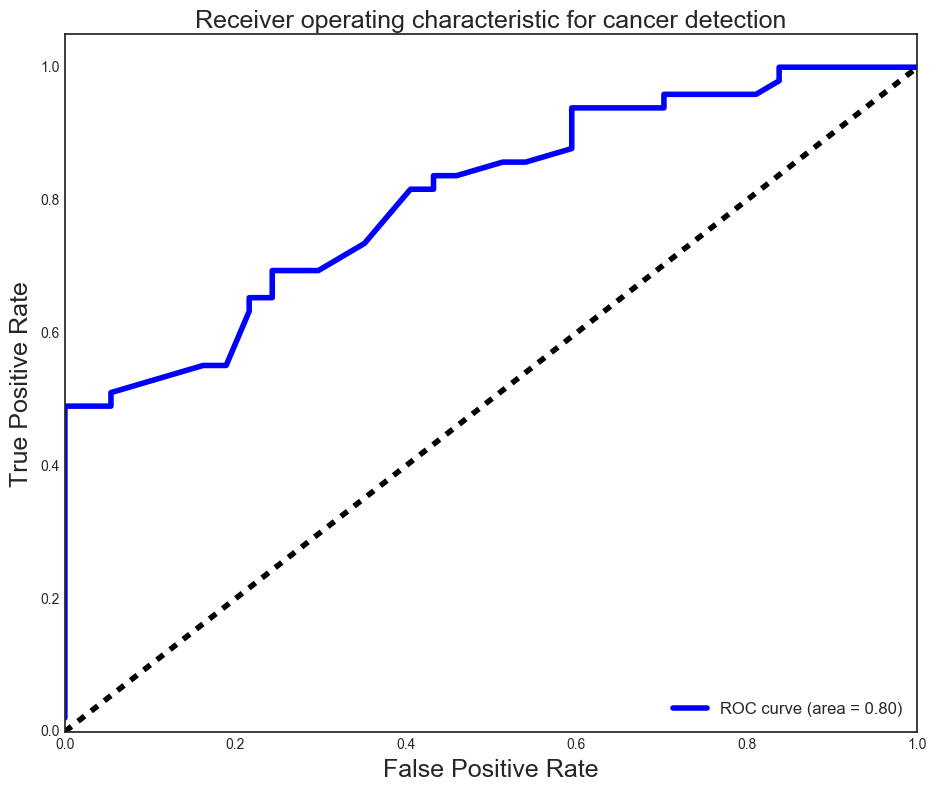

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

#fixed this
Y_score = logreg_1.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

What is the intuition for the ROC curve?

As the class assignment threshold increases for the positive class (has cancer), the false positive rate and true positive rate necessarily increase. For a classifier performing at chance, this would be the diagonal dotted line: an equal chance of false positives and true positives. 

The greater the area under the curve, the higher the ratio of true positives to false positives as the threshold becomes more lenient. Thus, the greater the area under the curve, the higher the quality of the classification model. In the Wisconsin breast cancer data the area under the curve is 0.99, indicating a nearly perfect model. Most classification problems will never get close to this!

Split into 66% training set and 33% testing set

In [65]:
#metrics_pct = np.array(bcw.metrics_pct.values)
#metrics_pct = metrics_pct[:, np.newaxis]
X_train, X_test, Y_train, Y_test = train_test_split(features_df, target_df, test_size=0.33, random_state=5)

NameError: name 'features_df' is not defined

Fit the logistic regression on the training data

In [66]:
logreg = LogisticRegression(random_state=5)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

Look at the confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix
# the input format is almost always (test, predict), but always check with documentation!
conmat = np.array(confusion_matrix(Y_test, Y_pred))

confusion = pd.DataFrame(conmat, index=['is_healthy', 'has_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])

print(confusion)

            predicted_healthy  predicted_cancer
is_healthy                 22                15
has_cancer                  9                40


### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [70]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=30)
L1Model= LogisticRegression(penalty='l1')
L1Model.fit(X_train, y_train)
dfTest3=X_test
dfTest3['predictedSalary'] = L1Model.predict(X_test)
dfTest3["actualSalary"] = y_test
print metrics.accuracy_score(y_test, dfTest3['predictedSalary'])
print pd.crosstab(y_test, dfTest3['predictedSalary'], rownames=['Actual'])

/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandertam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=30)
L2Model= LogisticRegression(penalty='l2')
L2Model.fit(X_train, y_train)
dfTest4=X_test
dfTest4['predictedSalary'] = L2Model.predict(X_test)
dfTest4["actualSalary"] = y_test
print metrics.accuracy_score(y_test, dfTest4['predictedSalary'])
print pd.crosstab(y_test, dfTest4['predictedSalary'], rownames=['Actual'])

/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexandertam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [72]:
model = LogisticRegression(penalty = 'l1', C=1.0)

for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    

IndentationError: expected an indented block (<ipython-input-72-1e568571ce9f>, line 4)

In [73]:
model.fit(X_scaled, y)

df = pd.DataFrame({'features' : X.design_info.column_names, 'coef': model.coef_[0,:]})
df.sort_values('coef', ascending=False, inplace=True)
df

NameError: name 'model' is not defined

#### Optional: Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients. Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary. Which entries have the highest predicted salaries?

# Bonus Section: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are most valuable? 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform()

for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(model, X_scaled, y, cv=3, scoring=metric)
    print(metric, scores.mean(), scores.std())

In [ ]:
model.fit(X_scaled, y)

df = pd.DataFrame({'features' : vectorizer.get_feature_names(), 'coef': model.coef_[0,:]})
df.sort_values('coef', ascending=False, inplace=True)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# retest L1 and L2 regularization
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV()


Score: | 16/24
------|-------
Identify: Problem Statement and Hypothesis | 3
Acquire: Import Data using BeautifulSoup| 3
Parse: Clean and Organize Data| 3
Model: Perform Logistic Regression| 3
Evaluate: Logistic Regression Results	| 1
Present: Blog Report with Findings and Recommendations		| 0
Interactive Tableau visualizations | 0
Regularization | 3
Bonus: Countvectorizer  | 0

In [ ]:
#AT - I didn't add many notes because you were obviously not done. Iron out the errors, reorder your project
#create dummy variables, print out the metrics and explainations about the confustion matrix, coefficients, etc
#write a blog, and make some visuals
#and then I can regrade if you would like.